Name: **Leopando, Lara Jeneane D.G.**<br>
Course and Section: **CPE 019 - CPE32S3**<br>
Date of Submission: **02-07-2024**<br>
Instructor: **Engr. Roman Richard**<br>

### Working with Python and SQLite

Objectives:<br>
- Part 1: The Dataset<br>
- Part 2: Scatterplot Graphs and Correlatable Variables<br>
- Part 3: Calculating Correlation with Python<br>
- Part 4: Visualizing </b>

##**Scenario/Background**
Correlation is an important statistical relationship that can indicate whether the variable values arelinearly related.

In this lab, you will learn how to use Python to calculate correlation. In Part 1, you will setup the dataset.In Part 2, you will learn how to identify if the variables in a given dataset are correlatable. Finally, in Part3, you will use Python to calculate the correlation between two sets of variable.

##**Required Resources**
- 1 PC with Internet access
- Raspberry Pi version 2 or higher
- Python libraries: pandas, numpy, matplotlib, seaborn
- Datafiles: brainsize.txt

#**Part 1: The Dataset**

You will use a dataset that contains a sample of 40 right-handed Anglo Introductory Psychologystudents at a large Southwestern university. Subjects took four subtests (Vocabulary, Similarities, BlockDesign, and Picture Completion) of the Wechsler (1981) Adult Intelligence Scale-Revised. Theresearchers used Magnetic Resonance Imaging (MRI) to determine the brain size of the subjects.Information about gender and body size (height and weight) are also included. The researchers withheldthe weights of two subjects and the height of one subject for reasons of confidentiality. Two simplemodifications were applied to the dataset:

1. Replace the quesion marks used to represent the withheld data points described above by the'NaN' string. The substitution was done because Pandas does not handle the question markscorrectly.
2. Replace all tab characters with commas, converting the dataset into a CSV dataset.

The prepared dataset is saved as brainsize.txt.

**Step 1: Loading the Dataset From a File.**

Before the dataset can be used, it must be loaded onto memory.

In the code below, The first line imports the `pandas` modules and defines
`pd` as a descriptor that refers tothe module.

The second line loads the dataset CSV file into a variable called `brainFile`.

The third line uses `read_csv()`, a `pandas` method, to convert the CSV dataset stored in `brainFile` into a dataframe. The dataframe is then stored in the `brainFrame` variable.

Run the cell below to execute the described functions.

In [ ]:
# Code cell 1
import pandas as pd
brainFile = '/content/brainsize.txt'
brainFrame = pd.read_csv(brainFile, delim_whitespace = True)

**Step 2: Verifying the dataframe.**
To make sure the dataframe has been correctly loaded and created, use the `head()` method. AnotherPandas method, `head()` displays the first five entries of a dataframe.

In [ ]:
# Code cell 2
brainFrame.head()

,Gender,FSIQ,VIQ,PIQ,Weight,Height,MRI_Count
0,Female,133,132,124,118.0,64.5,816932
1,Male,140,150,124,NaN,72.5,1001121
2,Male,139,123,150,143.0,73.3,1038437
3,Male,133,129,128,172.0,68.8,965353
4,Female,137,132,134,147.0,65.0,951545


#**Part 2: Scatterplot Graphs and Correlatable Variables**

**Step 1: The pandas `describe()` method.**

The pandas module includes the `describe()` method which performs same common calculationsagainst a given dataset. In addition to provide common results including count, mean, standarddeviation, minimum, and maximum, `describe()` is also a great way to quickly test the validity of thevalues in the dataframe.

Run the cell below to output the results computed by `describe()` against the brainFrame dataframe.

In [ ]:
# Code cell 3
brainFrame.describe()

,FSIQ,VIQ,PIQ,Weight,Height,MRI_Count
count,40.000000,40.000000,40.00000,38.000000,39.000000,4.000000e+01
mean,113.450000,112.350000,111.02500,151.052632,68.525641,9.087550e+05
std,24.082071,23.616107,22.47105,23.478509,3.994649,7.228205e+04
min,77.000000,71.000000,72.00000,106.000000,62.000000,7.906190e+05
25%,89.750000,90.000000,88.25000,135.250000,66.000000,8.559185e+05
50%,116.500000,113.000000,115.00000,146.500000,68.000000,9.053990e+05
75%,135.500000,129.750000,128.00000,172.000000,70.500000,9.500780e+05
max,144.000000,150.000000,150.00000,192.000000,77.000000,1.079549e+06


**Step 2: Scatterplot graphs**

Scatterplot graphs are important when working with correlations as they allow for a quick visualverification of the nature of the relationship between the variables. This lab uses the Pearson correlationcoefficient, which is sensitive only to a linear relationship between two variables. Other more robustcorrelation methods exist but are out of the scope of this lab.

*a. Load the required modules.*

Before graphs can be plotted, it is necessary to import a few modules, namely numpy and matplotlib .Run the cell below to load these modules.

In [ ]:
# Code cell 4
import numpy as np
import matplotlib.pyplot as plt

*b. Separate the data.*

To ensure the results do not get skewed because of the differences in male and female bodies, thedateframe is split into two dataframes: one containing all male entries and another with only femaleinstances.

Running the cell below creates the two new dataframes, menDf and womenDf, each one containing therespective entries.

In [ ]:
# Code cell 5
menDf = brainFrame[(brainFrame.Gender == 'Male')]
womenDf = brainFrame[(brainFrame.Gender == 'Female')]

*c. Plot the graphs.*

Because the dataset includes three different measures of intelligence (PIQ, FSIQ, and VIQ), the first linebelow uses Pandas` mean()` method to calculate the mean value between the three and store the result inthe `menMeanSmarts` variable. Notice that the first line also refers to the menDf, the filtered dataframecontaining only male entries.

The second line uses the `matplotlib` method `scatter()` to create a scatterplot graph between the `menMeanSmarts` variable and the `MRI_Count` attribute. The MRI_Count in this dataset can be thought as ofa measure of the physical size of the subjects' brains.

The third line simply displays the graph.

The fourth line is used to ensure the graph will be displayed in this notebook.

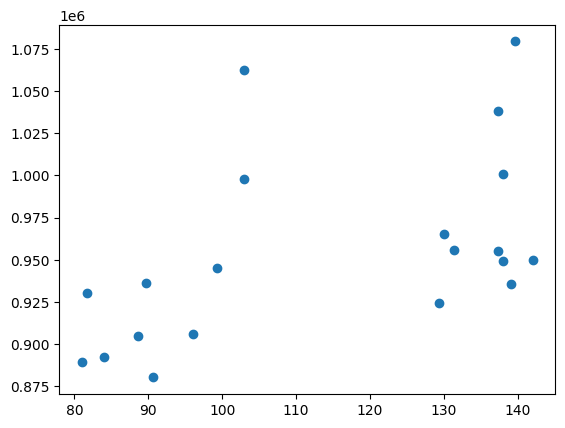

In [ ]:
# Code cell 6
menMeanSmarts = menDf[["PIQ","FSIQ","VIQ"]].mean(axis=1)
plt.scatter(menMeanSmarts,menDf["MRI_Count"])
plt.show()
%matplotlib inline

Similarly, the code below creates a scatterplot graph for the women-only filtered dataframe.

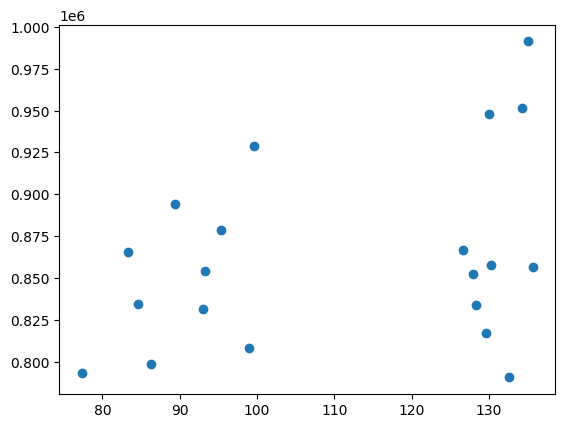

In [ ]:
# Code cell 7
# Graph the women-only filtered dataframe
womenMeanSmarts = womenDf[["PIQ","FSIQ","VIQ"]].mean(axis=1)
plt.scatter(womenMeanSmarts,womenDf["MRI_Count"])

plt.show()
%matplotlib inline

#**Part 3: Calculating Correlation with Python**

**Step 1: Calculate correlation against brainFrame.**

The pandas `corr()` method provides an easy way to calculate correlation against a dataframe. By simplycalling the method against a dataframe, one can get the correlation between all variables at the sametime.

In [ ]:
# Code cell 8
brainFrame.corr(method='pearson')

<ipython-input-35-cab48f3abe05>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  brainFrame.corr(method='pearson')


,FSIQ,VIQ,PIQ,Weight,Height,MRI_Count
FSIQ,1.000000,0.946639,0.934125,-0.051483,-0.086002,0.357641
VIQ,0.946639,1.000000,0.778135,-0.076088,-0.071068,0.337478
PIQ,0.934125,0.778135,1.000000,0.002512,-0.076723,0.386817
Weight,-0.051483,-0.076088,0.002512,1.000000,0.699614,0.513378
Height,-0.086002,-0.071068,-0.076723,0.699614,1.000000,0.601712
MRI_Count,0.357641,0.337478,0.386817,0.513378,0.601712,1.000000


Notice at the left-to-right diagonal in the correlation table generated above.
Why is the diagonal filledwith 1s? Is that a coincidence? Explain.

Still looking at the correlation table above, notice that the values are mirrored; values below the 1diagonal have a mirrored counterpart above the 1 diagonal. Is that a coincidence? Explain.

Using the same `corr()` method, it is easy to calculate the correlation of the variables contained in thefemale-only dataframe:

In [ ]:
# Code cell 9
womenDf.corr(method='pearson')

<ipython-input-36-a6271751808a>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  womenDf.corr(method='pearson')


,FSIQ,VIQ,PIQ,Weight,Height,MRI_Count
FSIQ,1.000000,0.955717,0.939382,0.038192,-0.059011,0.325697
VIQ,0.955717,1.000000,0.802652,-0.021889,-0.146453,0.254933
PIQ,0.939382,0.802652,1.000000,0.113901,-0.001242,0.396157
Weight,0.038192,-0.021889,0.113901,1.000000,0.552357,0.446271
Height,-0.059011,-0.146453,-0.001242,0.552357,1.000000,0.174541
MRI_Count,0.325697,0.254933,0.396157,0.446271,0.174541,1.000000


And the same can be done for the male-only dataframe:

In [ ]:
# Code cell 10
# Use corr() for the male-only dataframe with the pearson method
menDf.corr(method='pearson')

<ipython-input-38-cc2854916971>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  menDf.corr(method='pearson')


,FSIQ,VIQ,PIQ,Weight,Height,MRI_Count
FSIQ,1.000000,0.944400,0.930694,-0.278140,-0.356110,0.498369
VIQ,0.944400,1.000000,0.766021,-0.350453,-0.355588,0.413105
PIQ,0.930694,0.766021,1.000000,-0.156863,-0.287676,0.568237
Weight,-0.278140,-0.350453,-0.156863,1.000000,0.406542,-0.076875
Height,-0.356110,-0.355588,-0.287676,0.406542,1.000000,0.301543
MRI_Count,0.498369,0.413105,0.568237,-0.076875,0.301543,1.000000


#**Part 4: Visualizing**

**Step 1: Install Seaborn.**

To make it easier to visualize the data correlations, heatmap graphs can be used. Based on coloredsquares, heatmap graphs can help identify correlations in a glance.

The Python module named `seaborn` makes it very easy to plot heatmap graphs.

First, run the cell below to download and install the seaborn module.

In [ ]:
# Code cell 11
!pip install seaborn

Step 2: Plot the correlation heatmap.

Now that the dataframes are ready, the heatmaps can be plotted. Below is a breakdown of the code in thecell below:

Line 1: Generates a correlation table based on the `womenNoGenderDf` dataframe and stores it on `wcorr`.

Line 2: Uses the `seaborn heatmap()` method to generate and plot the heatmap. Notice that `heatmap()` takes `wcorr` as a parameter.

Line 3: Use to export and save the generated heatmap as a PNG image. While the line 3 is not active (it has the comment # character preceding it, forcing the interpreter to ignore it), it was kept for informational purposes.

<ipython-input-44-4bc71e77167c>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  wcorr = womenDf.corr()


<Axes: >

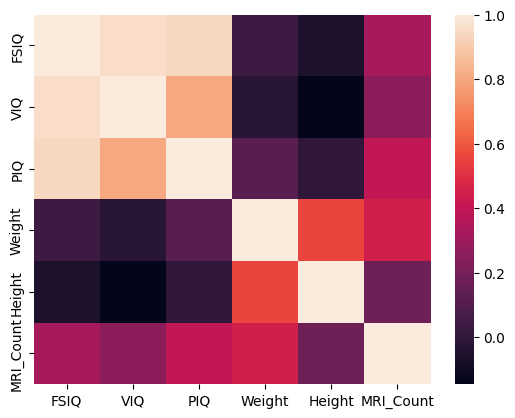

In [ ]:
# Code cell 12
import seaborn as sns

wcorr = womenDf.corr()
sns.heatmap(wcorr)
#plt.savefig('attribute_correlations.png', tight_layout=True)

Similarly, the code below creates and plots a heatmap for the male-only dataframe.

<ipython-input-43-ff3e250059fc>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  mcorr = menDf.corr()


<Axes: >

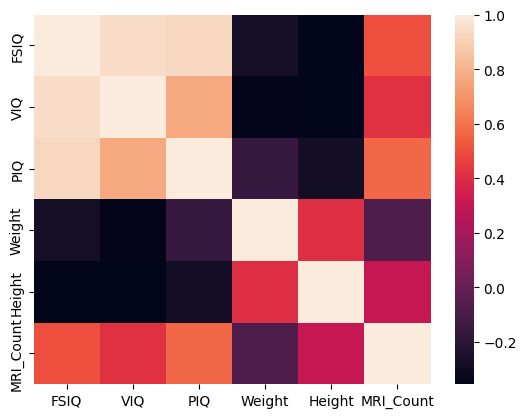

In [ ]:
# Code cell 14
mcorr = menDf.corr()
sns.heatmap(mcorr)
#plt.savefig('attribute_correlations.png', tight_layout=True)

**Many variable pairs present correlation close to zero. What does that mean?**
- It means that those variables are less significant, and is less likely to affect the brain size.

**Why separate the genders?**

- Separating the genders makes it easier to analyze and compare two types of data.

**What variables have stronger correlation with brain size (MRI_Count)? Is that expected? Explain.**
- I believe that the FSIQ, VIQ, and the PIQ have a stronger correlation with the brain size compared to the other variables. These three are more likely to affect the brain size, that is why it is more expected. In addition, its corresponding color is closer based on the data.

#**SUPPLEMENTARY ACTIVITY:**

Look for (any) real-world dataset and perform exploratory and statistical analysis.

In [ ]:
import pandas as pd
dataset = '/content/dataset.txt'
datasetFrame = pd.read_csv(dataset, delim_whitespace = True, on_bad_lines='skip')

In [ ]:
datasetFrame.head()

,Rank,Title,Type,Premiere,Genre,Watchtime
0,1,The_Night_Agent,TVShow,2023,Action,"812,100,000"
1,2,Ginny_&-Georgia,TVShow,2021,Drama,"665,100,000"
2,3,The-Glory,TVShow,2022,Thriller,"622,800,000"
3,4,Wednesday,TVShow,2022,Fantasy,"507,700,000"
4,5,Queen_Charlotte,TVShow,2023,Drama,"503,000,000"


In [ ]:
datasetFrame.describe()

,Rank,Premiere
count,48.000000,48.000000
mean,25.875000,2020.812500
std,14.745537,3.043348
min,1.000000,2011.000000
25%,13.500000,2020.000000
50%,26.500000,2022.000000
75%,38.250000,2023.000000
max,50.000000,2023.000000


In [ ]:
TVShowDf = datasetFrame[(datasetFrame.Type == 'TVShow')]
MovieDf = datasetFrame[(datasetFrame.Type == 'Movie')]

<ipython-input-73-6ed1ae3d7289>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  TVShowMean = TVShowDf[["Title","Premiere","Genre","Watchtime"]].mean(axis=1)


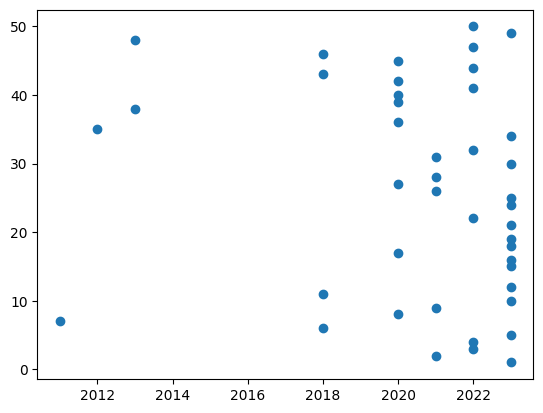

In [ ]:
TVShowMean = TVShowDf[["Title","Premiere","Genre","Watchtime"]].mean(axis=1)
plt.scatter(TVShowMean,TVShowDf["Rank"])
plt.show()
%matplotlib inline

<ipython-input-75-66b933980403>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  MovieMean = MovieDf[["Title","Premiere","Genre","Watchtime"]].mean(axis=1)


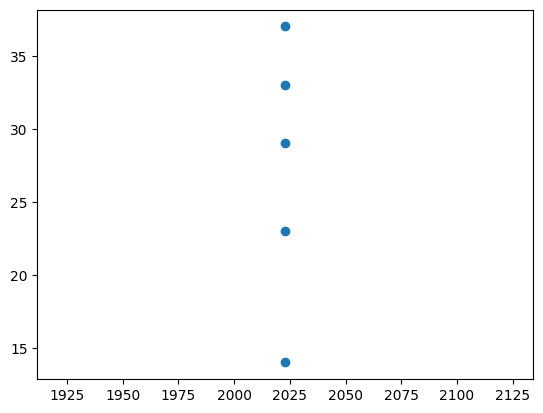

In [ ]:
MovieMean = MovieDf[["Title","Premiere","Genre","Watchtime"]].mean(axis=1)
plt.scatter(MovieMean,MovieDf["Rank"])
plt.show()
%matplotlib inline

In [ ]:
datasetFrame.corr(method='pearson')

<ipython-input-77-f3f322025eb0>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  datasetFrame.corr(method='pearson')


,Rank,Premiere
Rank,1.000000,-0.160787
Premiere,-0.160787,1.000000


from matplotlib import pyplot as plt
_df_4['Rank'].plot(kind='hist', bins=20, title='Rank')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5['Premiere'].plot(kind='hist', bins=20, title='Premiere')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6.plot(kind='scatter', x='Rank', y='Premiere', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Premiere']
  ys = series['Rank']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_7.sort_values('Premiere', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Premiere')
_ = plt.ylabel('Rank')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['Premiere']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'Premiere'}, axis=1)
              .sort_values('Premiere', ascending=True))
  xs = counted['Premiere']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_8.sort_values('Premiere', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Premiere')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
_df_9['Rank'].plot(kind='line', figsize=(8, 4), title='Rank')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_10['Premiere'].plot(kind='line', figsize=(8, 4), title='Premiere')
plt.gca().spines[['top', 'right']].set_visible(False)

<ipython-input-78-b08231a5ddc1>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  wcorr = TVShowDf.corr()


<Axes: >

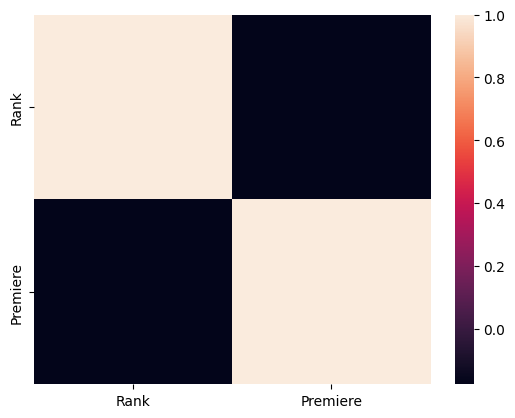

In [ ]:
import seaborn as sns

wcorr = TVShowDf.corr()
sns.heatmap(wcorr)
#plt.savefig('attribute_correlations.png', tight_layout=True)

<ipython-input-79-dc902f5c93ae>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  wcorr = MovieDf.corr()


<Axes: >

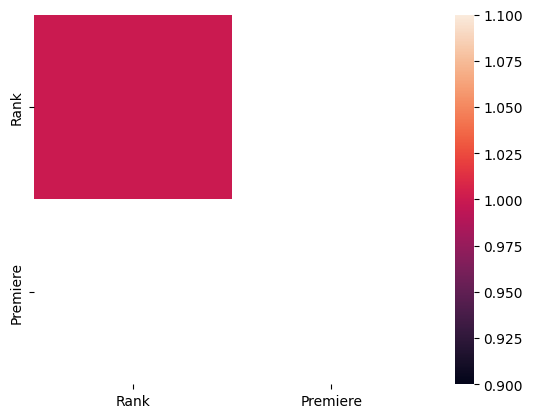

In [ ]:
import seaborn as sns

wcorr = MovieDf.corr()
sns.heatmap(wcorr)
#plt.savefig('attribute_correlations.png', tight_layout=True)

#**Conclusions/Observations/Analysis:**

- Concluding our activity, it was quite easy to understand and apply the given codes at first. There were some modifications, but were bearable, as it has a simple solution and some additional codes to make it work. On the other hand, it was quite difficult to find the data set to be used, given that it seems to be required to be precise. Such spaces affect the table, and causes minor errors. I have tried .csv and .xlsx files but it caused errors. Moreover, the data I have used still have some minor problems given that some data are not loaded due to some error. Overall, I will study this further to be able to understand and apply the codes better